# Assignment 2

## GPU Managment

In [ ]:
# https://nvidia.custhelp.com/app/answers/detail/a_id/3751/~/useful-nvidia-smi-queries
# https://helpmanual.io/help/nvidia-smi/
# https://docs.python.org/3/library/subprocess.html
# https://www.microway.com/hpc-tech-tips/nvidia-smi_control-your-gpus/
# https://kannankumar.github.io/data-diary/jupyter/deep-learning/2020/04/22/Tracking_GPU_Memory_Usage.html

!nvidia-smi
!nvidia-smi -q 
!nvidia-smi --help
!nvidia-smi --query-gpu=gpu_name --format=csv
!nvidia-smi --query-gpu=utilization.memory --format=csv
!nvidia-smi --query-gpu=memory.total --format=csv
!nvidia-smi --query-gpu=memory.used --format=csv

Wed Mar 23 19:21:33 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P8    34W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
test=0
test = !nvidia-smi --query-gpu=memory.free --format=csv
print(test[1])

11441 MiB


In [ ]:
# https://gist.github.com/telegraphic/ecb8161aedb02d3a09e39f9585e91735
import subprocess
import pprint

sp = subprocess.Popen(['nvidia-smi', '-q'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)

out_str = sp.communicate()
# out_list = out_str[0].split('\n')
out_list = out_str[0].decode("utf-8").split('\n')

out_dict = {}

for item in out_list:
    try:
        key, val = item.split(':')
        key, val = key.strip(), val.strip()
        out_dict[key] = val
    except:
        pass

pprint.pprint(out_dict)

{'Accounting Mode': 'Disabled',
 'Accounting Mode Buffer Size': '4000',
 'Active Sessions': '0',
 'Applications Clocks Setting': 'Not Active',
 'Attached GPUs': '1',
 'Auto Boost': 'On',
 'Auto Boost Default': 'On',
 'Average FPS': '0',
 'Average Latency': '0',
 'Board ID': '0x4',
 'Bus': '0x00',
 'CBU': 'N/A',
 'CUDA Version': '11.2',
 'Compute Mode': 'Default',
 'Current': 'Enabled',
 'Decoder': '0 %',
 'Default Power Limit': '149.00 W',
 'Device': '0x04',
 'Device Id': '0x102D10DE',
 'Device Memory': '0',
 'Display Active': 'Disabled',
 'Display Clock Setting': 'Not Active',
 'Display Mode': 'Disabled',
 'Domain': '0x0000',
 'Double Bit ECC': '0',
 'Driver Version': '460.32.03',
 'ECC Object': '3.0',
 'Encoder': '0 %',
 'Enforced Power Limit': '149.00 W',
 'Fan Speed': 'N/A',
 'Firmware': 'N/A',
 'Free': '16382 MiB',
 'GPU Current Temp': '74 C',
 'GPU Max Operating Temp': 'N/A',
 'GPU Part Number': '900-22080-6300-000',
 'GPU Shutdown Temp': '93 C',
 'GPU Slowdown Temp': '88 C',
 'G

In [ ]:
from typing import Dict, List
import subprocess as sb
import os, re

def get_gpu_query(params: List[str], units=True) -> Dict[str, int]:
    """Get the current gpu usage.

    Return:
        A dictionary in which the keys are device ids as integers and
        values are memory usage as integers in MB.
    """
    p_unit = ''
    if units is False:
      p_unit = 'nounits'

    result = subprocess.run(
        ["nvidia-smi", "--query-gpu={}".format(','.join(params)), "--format=csv,{0},noheader".format(p_unit)],
        encoding="utf-8",
        # capture_output=True,          # valid for python version >=3.7
        stdout=sb.PIPE,
        stderr=sb.PIPE,  # for backward compatibility with python version 3.6
        check=True,
    )
    print(result.stdout)
    results_list = result.stdout.strip().replace(', ', ',').split(',')
    print(results_list)
    print(len(results_list))
    return dict(zip(params, results_list))


def get_gpu_full_query_popen():

  result = subprocess.Popen(['nvidia-smi', '-q'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
  out_str = result.communicate()
  print(out_str)
  out_list = out_str[0].decode("utf-8").split('\n')
  out_dict = {}

  for item in out_list:
      try:
          key, val = item.split(':')
          key, val = key.strip(), val.strip()
          out_dict[key] = val
      except:
          pass
  return out_dict


def get_gpu_full_query_run() -> Dict[str, int]:

    result = subprocess.run(
        ['nvidia-smi', '-q'],
        encoding="utf-8",
        # capture_output=True,          # valid for python version >=3.7
        stdout=sb.PIPE,
        stderr=sb.PIPE,  # for backward compatibility with python version 3.6
        check=True,
    )
    out_list = str(result.stdout).split('\n')
    out_dict = {}

    for item in out_list:
        try:
            key, val = item.split(':')
            key, val = key.strip(), val.strip()
            out_dict[key] = val
        except:
            pass
    return out_dict



In [ ]:
param = ['memory.used','memory.free', 'memory.total', 'utilization.memory']
get_gpu_query(param, units=True)

0 MiB, 11441 MiB, 11441 MiB, 0 %

['0 MiB', '11441 MiB', '11441 MiB', '0 %']
4


{'memory.free': '11441 MiB',
 'memory.total': '11441 MiB',
 'memory.used': '0 MiB',
 'utilization.memory': '0 %'}

In [ ]:
get_gpu_full_query_popen()

(b'\n==============NVSMI LOG==============\n\nTimestamp                                 : Wed Mar 23 19:22:20 2022\nDriver Version                            : 460.32.03\nCUDA Version                              : 11.2\n\nAttached GPUs                             : 1\nGPU 00000000:00:04.0\n    Product Name                          : Tesla K80\n    Product Brand                         : Tesla\n    Display Mode                          : Disabled\n    Display Active                        : Disabled\n    Persistence Mode                      : Disabled\n    MIG Mode\n        Current                           : N/A\n        Pending                           : N/A\n    Accounting Mode                       : Disabled\n    Accounting Mode Buffer Size           : 4000\n    Driver Model\n        Current                           : N/A\n        Pending                           : N/A\n    Serial Number                         : 0320816054248\n    GPU UUID                              : GPU-f

{'Accounting Mode': 'Disabled',
 'Accounting Mode Buffer Size': '4000',
 'Active Sessions': '0',
 'Applications Clocks Setting': 'Not Active',
 'Attached GPUs': '1',
 'Auto Boost': 'On',
 'Auto Boost Default': 'On',
 'Average FPS': '0',
 'Average Latency': '0',
 'Board ID': '0x4',
 'Bus': '0x00',
 'CBU': 'N/A',
 'CUDA Version': '11.2',
 'Compute Mode': 'Default',
 'Current': 'Enabled',
 'Decoder': '0 %',
 'Default Power Limit': '149.00 W',
 'Device': '0x04',
 'Device Id': '0x102D10DE',
 'Device Memory': '0',
 'Display Active': 'Disabled',
 'Display Clock Setting': 'Not Active',
 'Display Mode': 'Disabled',
 'Domain': '0x0000',
 'Double Bit ECC': '0',
 'Driver Version': '460.32.03',
 'ECC Object': '3.0',
 'Encoder': '0 %',
 'Enforced Power Limit': '149.00 W',
 'Fan Speed': 'N/A',
 'Firmware': 'N/A',
 'Free': '16382 MiB',
 'GPU Current Temp': '73 C',
 'GPU Max Operating Temp': 'N/A',
 'GPU Part Number': '900-22080-6300-000',
 'GPU Shutdown Temp': '93 C',
 'GPU Slowdown Temp': '88 C',
 'G

In [ ]:
get_gpu_full_query_run()

{'Accounting Mode': 'Disabled',
 'Accounting Mode Buffer Size': '4000',
 'Active Sessions': '0',
 'Applications Clocks Setting': 'Not Active',
 'Attached GPUs': '1',
 'Auto Boost': 'On',
 'Auto Boost Default': 'On',
 'Average FPS': '0',
 'Average Latency': '0',
 'Board ID': '0x4',
 'Bus': '0x00',
 'CBU': 'N/A',
 'CUDA Version': '11.2',
 'Compute Mode': 'Default',
 'Current': 'Enabled',
 'Decoder': '0 %',
 'Default Power Limit': '149.00 W',
 'Device': '0x04',
 'Device Id': '0x102D10DE',
 'Device Memory': '0',
 'Display Active': 'Disabled',
 'Display Clock Setting': 'Not Active',
 'Display Mode': 'Disabled',
 'Domain': '0x0000',
 'Double Bit ECC': '0',
 'Driver Version': '460.32.03',
 'ECC Object': '3.0',
 'Encoder': '0 %',
 'Enforced Power Limit': '149.00 W',
 'Fan Speed': 'N/A',
 'Firmware': 'N/A',
 'Free': '16382 MiB',
 'GPU Current Temp': '74 C',
 'GPU Max Operating Temp': 'N/A',
 'GPU Part Number': '900-22080-6300-000',
 'GPU Shutdown Temp': '93 C',
 'GPU Slowdown Temp': '88 C',
 'G

In [ ]:
!nvidia-smi -h

NVIDIA System Management Interface -- v460.32.03

NVSMI provides monitoring information for Tesla and select Quadro devices.
The data is presented in either a plain text or an XML format, via stdout or a file.
NVSMI also provides several management operations for changing the device state.

Note that the functionality of NVSMI is exposed through the NVML C-based
library. See the NVIDIA developer website for more information about NVML.
Python wrappers to NVML are also available.  The output of NVSMI is
not guaranteed to be backwards compatible; NVML and the bindings are backwards
compatible.

http://developer.nvidia.com/nvidia-management-library-nvml/
http://pypi.python.org/pypi/nvidia-ml-py/
Supported products:
- Full Support
    - All Tesla products, starting with the Kepler architecture
    - All Quadro products, starting with the Kepler architecture
    - All GRID products, starting with the Kepler architecture
    - GeForce Titan products, starting with the Kepler architecture
- L

## Initialization

In [ ]:
#@title Mount your Google Drive
# If you run this notebook locally or on a cluster (i.e. not on Google Colab)
# you can delete this cell which is specific to Google Colab. You may also
# change the paths for data/logs in Arguments below.
%matplotlib inline
%load_ext autoreload
%autoreload 2

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#@title Link your assignment folder & install requirements
#@markdown Enter the path to the assignment folder in your Google Drive
# If you run this notebook locally or on a cluster (i.e. not on Google Colab)
# you can delete this cell which is specific to Google Colab. You may also
# change the paths for data/logs in Arguments below.
import sys
import os
import shutil
import warnings

folder = "/content/gdrive/MyDrive/Master_UdeM/IFT-6135_H2022/IFT6135_Programming/assignment2" #@param {type:"string"}
!ln -Ts "$folder" /content/assignment 2> /dev/null

# Add the assignment folder to Python path
if '/content/assignment' not in sys.path:
  sys.path.insert(0, '/content/assignment')

# Install requirements
!pip install -qr /content/assignment/requirements.txt

# Check if CUDA is available
import torch
if not torch.cuda.is_available():
  warnings.warn('CUDA is not available.')

ERROR: Invalid requirement: 'import warnings' (from line 1 of /content/assignment/requirements.txt)


### Running on GPU
For this assignment, it will be necessary to run your experiments on GPU. To make sure the notebook is running on GPU, you can change the notebook settings with
* (EN) `Edit > Notebook Settings`
* (FR) `Modifier > Paramètres du notebook`


In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim
import urllib.request

from dataclasses import dataclass
from torch.utils.data import DataLoader
from tqdm import tqdm

from lstm_solution import LSTM
from utils.wikitext2 import Wikitext2
from utils.torch_utils import seed_experiment, to_device

from vit_solution import VisionTransformer
#from utils.data_utils import save_logs_vit


## Plots Class

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.image as mpimg
from google.colab.patches import cv2_imshow
%matplotlib inline
   

class Charts:
    """
    https://www.python-graph-gallery.com/treemap/
    https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/

    """

    def __init__(self, height, width, dpi=80):
        self.height = height
        self.width = width
        self.dpi = dpi
        # self.figure = figure(figsize=(self.height, self.width), dpi=self.dpi)
    def combinedplot(self):
        pass

    def lineplot(self, x, courbes, legendes, grid, xlabel, ylabel, title):
        """
        >>> paramlist = [0.01,0.1,0.2,0.3,0.4,0.5,1.0,3.0,10.0,20.0]

        >>> erlist_hard = [0.01,0.1,0.2,0.3,0.4,0.5,1.0,3.0,10.0,20.0]
        >>> erlist_soft = [0.01,0.1,0.2,0.3,0.4,0.5,1.0,3.0,10.0,20.0]
        
        >>> plotlines(paramlist, [erlist_hard,erlist_soft], ['hard parzen window','soft parzen window'], False, 'valeurs de h ou sigma', 'f(x)', "title")

        """
        for i,c in enumerate(courbes):
            plt.plot(x[i], c)

        plt.grid(grid) # add a grid
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        print((legendes))
        print(set(legendes))
        plt.legend((legendes))
        plt.title(title)
        return plt

    # @fig(figure="self.figure")
    def imgplot(self, matrix, title=None, cmap=None):
        print(matrix.shape)

        figure(figsize=(self.height, self.width), dpi=self.dpi)
        if title:
          print(title)
        
        if len(matrix.shape) == 2:
          imgplot = plt.imshow(matrix, cmap=cmap)
        
        else:
          raise AttributeError(" 'matrix' should be a 2 dimensions matrix")
        
        return imgplot
    
    def matplot(self, matrix, title=None):
        print(matrix.shape)
        figure(figsize=(self.height, self.width), dpi=self.dpi)
        if title:
          print(title)
        
        if len(matrix.shape) == 2:
          matplot = plt.matshow(matrix)
        
        else:
          raise AttributeError(" 'matrix' should be a 2 dimensions matrix")
        
        return matplot
    

## LSTM Experiments

Below we define a few default arguments to get you started with your experiments. You are encouraged to modify the function `main()`, as well as these arguments, to fit your needs (e.g. changing hyperparameters, the optimizer, adding regularization, adding logs).

In [ ]:
@dataclass
class Arguments_lstm:
  # Data
  data_folder: str = '/content/assignment/data'
  batch_size: int = 16

  # Model
  model: str = 'lstm'  # [lstm, gpt1]
  embeddings: str = '/content/assignment/data/embeddings.npz'
  layers: int = 1

  # Optimization
  optimizer: str = 'adamw'  # [sgd, momentum, adam, adamw]
  epochs: int = 10
  lr: float = 1e-3
  momentum: float = 0.9
  weight_decay: float = 5e-4

  # Experiment
  exp_id: str = 'debug'
  log: bool = True
  log_dir: str = '/content/assignment/logs'
  seed: int = 42

  # Miscellaneous
  num_workers: int = 2
  device: str = 'cuda'
  progress_bar: bool = False
  print_every: int = 10

The 6 configurations you need to run in Problem 1. Be careful that there is no discrepency between the configurations defined in `run_exp_lstm.py` and the ones below. In case there is a difference, the version from `run_exp_lstm.py` should be considered the ones to run.

In [ ]:
# Note: if there is any discrepency with the configurations in run_exp_lstm.py, the
# version from run_exp_lstm.py should be the ones to use in Problem 1.
configs_lstm = {
  1: Arguments_lstm(model='lstm', layers=1, batch_size=16, log=True, epochs=10, optimizer='adam', exp_id="lstm_exp_1"),#10
  2: Arguments_lstm(model='lstm', layers=1, batch_size=16, log=True, epochs=10, optimizer='adamw', exp_id="lstm_exp_2"),
  3: Arguments_lstm(model='lstm', layers=1, batch_size=16, log=True, epochs=10, optimizer='sgd', exp_id="lstm_exp_3"),
  4: Arguments_lstm(model='lstm', layers=1, batch_size=16, log=True, epochs=10, optimizer='momentum', exp_id="lstm_exp_4"),
  5: Arguments_lstm(model='lstm', layers=2, batch_size=16, log=True, epochs=10, optimizer='adamw', exp_id="lstm_exp_5"),
  6: Arguments_lstm(model='lstm', layers=4, batch_size=16, log=True, epochs=10, optimizer='adamw', exp_id="lstm_exp_6")
}

### LSTM Trainning

In [ ]:

# from utils.data_utils import save_logs_lstm
# from run_exp_lstm import train, evaluate, main_lstm


# for k in configs_lstm.keys():
#   print(k)
#   # get config
#   args = configs_lstm[k]  # Run the first configuration
#   #train
#   logs = main_lstm(args)
#   # save log
#   if args.log:
#     save_logs_lstm(args, *logs)



### Plots LSTM Experiments Results

#### Losses

1
[6.58363041513116, 5.683700330418812, 5.3358749627554465, 5.101432121995862, 4.924930833455114, 4.781701522136347, 4.6627014524577435, 4.562684250523388, 4.474615324075987, 4.395218404054402]
[5.90512612304495, 5.509151981460551, 5.308104340941645, 5.186681785892385, 5.110790657539231, 5.0634037339438995, 5.023433759583471, 4.995491879270412, 4.98848281565588, 4.978241298704718]
Exp 1 - LSTM train and valid losses over epochs
['training loss', 'validation loss']
{'training loss', 'validation loss'}
/content/assignment/logs/lstm_exp_1/Exp 1 - LSTM train and valid losses over epochs.png
------------
2
[6.586213936808538, 5.694530544911282, 5.345897533041959, 5.107130941808363, 4.927130517558705, 4.782085007840781, 4.664536801195128, 4.564580411335758, 4.476329714770852, 4.397473714590483]
[5.920379357451263, 5.521186210975672, 5.3156676041195166, 5.189761999660792, 5.10865080782678, 5.05888848231795, 5.018161460780538, 4.995650896499865, 4.986680895920532, 4.976530698104762]
Exp 2 - LS

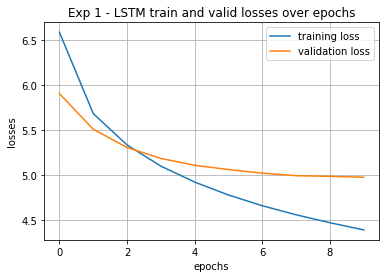

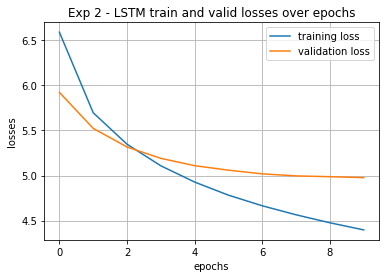

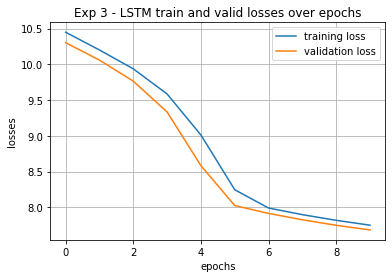

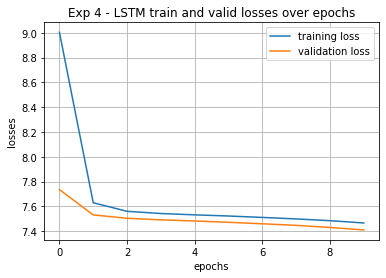

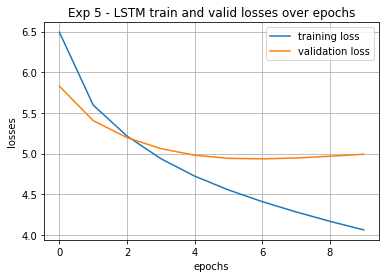

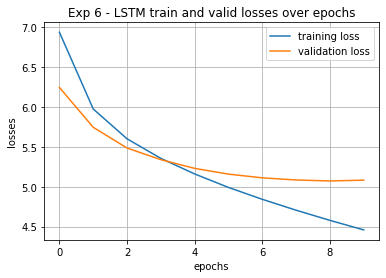

In [ ]:
# , replace
D = Charts(29,29)
for k in configs_lstm.keys():
  # k=3
  plt.figure(k)
  print(k)
  try:
    args = configs_lstm[k] 
    log_dir = os.path.join(args.log_dir, args.exp_id)

    with open(os.path.join(log_dir, "train_loss.txt")) as f:
        train_losses = f.readlines()
        train_losses = [float(str(e).replace("\n", "")) for e in train_losses]

    with open(os.path.join(log_dir, "valid_loss.txt")) as f:
        valid_losses = f.readlines()
        valid_losses = [float(str(e).replace("\n", "")) for e in valid_losses]

    print(train_losses)
    print(valid_losses)
    D = Charts(29,29)
    title="Exp {} - LSTM train and valid losses over epochs".format(k)
    xlabel="epochs"
    ylabel="losses"
    print(title)
    D.lineplot(range(10), 
                [train_losses, valid_losses], 
                ["training loss", "validation loss"], 
                True,
                xlabel, 
                ylabel,
                title)
    saved_plot = os.path.join(log_dir, title+".png")
    print(saved_plot)
    plt.savefig(saved_plot)
    print("------------")
  except:
    print("experiment folder not found, train the experiement first")

# /content/assignment/logs/exp_1/valid_loss.txt

#### Perplexity

1
[6.939168543632452, 5.9759747603060935, 5.601527662375803, 5.35600881534952, 5.1605139881749995, 4.9910446154038555, 4.842184336478466, 4.705539642197335, 4.577923037328421, 4.458221971304334]
[6.246186357814198, 5.745954038699468, 5.485795634651246, 5.339627422058644, 5.2306047771591695, 5.158336529360773, 5.111914586873414, 5.08491762521832, 5.072805836431993, 5.08279863728676]
Exp 1 - LSTM train and valid perplexity over epochs
['train_ppls', 'valid_ppls']
{'valid_ppls', 'train_ppls'}
/content/assignment/logs/lstm_exp_1/Exp 1 - LSTM train and valid perplexity over epochs.png
------------
2
[6.939168543632452, 5.9759747603060935, 5.601527662375803, 5.35600881534952, 5.1605139881749995, 4.9910446154038555, 4.842184336478466, 4.705539642197335, 4.577923037328421, 4.458221971304334]
[6.246186357814198, 5.745954038699468, 5.485795634651246, 5.339627422058644, 5.2306047771591695, 5.158336529360773, 5.111914586873414, 5.08491762521832, 5.072805836431993, 5.08279863728676]
Exp 2 - LSTM tr

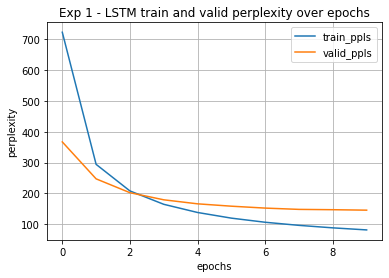

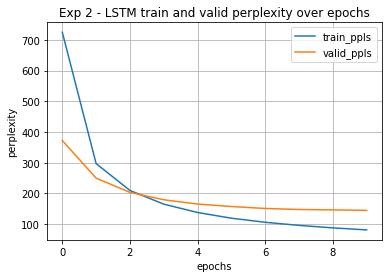

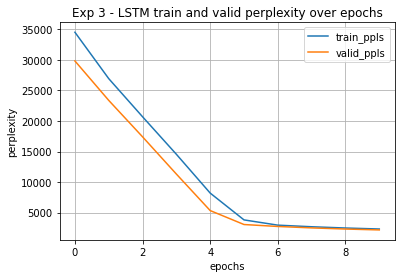

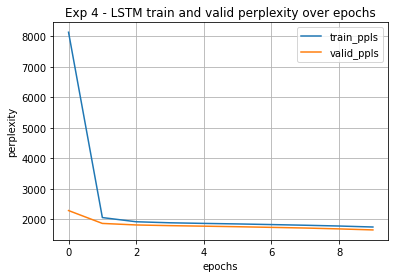

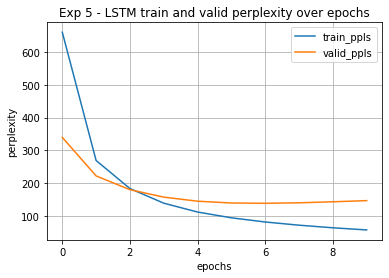

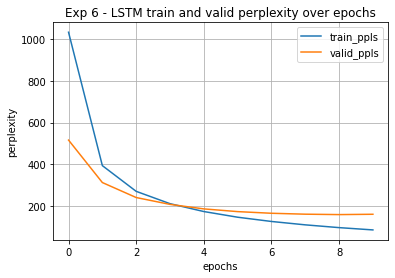

In [ ]:
# , replace
D = Charts(29,29)
for k in configs_lstm.keys():
  # k=3
  plt.figure(k)
  print(k)
  try:
    args = configs_lstm[k] 
    log_dir = os.path.join(args.log_dir, args.exp_id)

    # with open(os.path.join(log_dir, "train_loss.txt")) as f:
    #     train_losses = f.readlines()
    #     train_losses = [float(str(e).replace("\n", "")) for e in train_losses]

    # with open(os.path.join(log_dir, "valid_loss.txt")) as f:
    #     valid_losses = f.readlines()
    #     valid_losses = [float(str(e).replace("\n", "")) for e in valid_losses]
    
    with open(os.path.join(log_dir, "train_ppl.txt")) as f:
        train_ppls = f.readlines()
        train_ppls = [float(str(e).replace("\n", "")) for e in train_ppls]

    with open(os.path.join(log_dir, "valid_ppl.txt")) as f:
        valid_ppls = f.readlines()
        valid_ppls = [float(str(e).replace("\n", "")) for e in valid_ppls]

    print(train_losses)
    print(valid_losses)
    D = Charts(29,29)
    title="Exp {} - LSTM train and valid perplexity over epochs".format(k)
    xlabel="epochs"
    ylabel="perplexity"
    print(title)
    D.lineplot(range(10), 
                [train_ppls, valid_ppls], 
                ["train_ppls", "valid_ppls"], 
                True,
                xlabel, 
                ylabel,
                title)
    saved_plot = os.path.join(log_dir, title+".png")
    print(saved_plot)
    plt.savefig(saved_plot)
    print("------------")
  except:
    print("experiment folder not found, train the experiement first")

# /content/assignment/logs/exp_1/valid_loss.txt

# VIT Experiments


In [ ]:
@dataclass
class Arguments_vit:
  # Data
  data_folder: str = '/content/assignment/data'
  batch_size: int = 16

  # Model
  model: str = 'lstm'  # [lstm, gpt1]
  embeddings: str = '/content/assignment/data/embeddings.npz'
  # layers: int = 1
  num_layers: int = 1

  # Optimization
  optimizer: str = 'adamw'  # [sgd, momentum, adam, adamw]
  epochs: int = 10
  # lr: float = 1e-3
  lr: float = 3e-4
  momentum: float = 0.9
  weight_decay: float = 5e-4

  # Experiment
  exp_id: str = 'debug'
  log: bool = True
  log_dir: str = '/content/assignment/logs'
  seed: int = 42

  # Miscellaneous
  num_workers: int = 2
  device: str = 'cuda'
  progress_bar: bool = False
  print_every: int = 10

  # autre
  block: str = 'prenorm'

In [ ]:
# Note: if there is any discrepency with the configurations in run_exp_lstm.py, the
# version from run_exp_lstm.py should be the ones to use in Problem 1.
configs_vit = {
  1: Arguments_vit(model='vit', num_layers=2, batch_size=128, log=True, epochs=10, optimizer='adam', exp_id="vit_exp2_1"),#10
  2: Arguments_vit(model='vit', num_layers=2, batch_size=128, log=True, epochs=10, optimizer='adamw', exp_id="vit_exp2_2"),
  3: Arguments_vit(model='vit', num_layers=2, batch_size=128, log=True, epochs=10, optimizer='sgd', exp_id="vit_exp2_3"),
  4: Arguments_vit(model='vit', num_layers=2, batch_size=128, log=True, epochs=10, optimizer='momentum', exp_id="vit_exp2_4"),

  5: Arguments_vit(model='vit', num_layers=4, batch_size=128, log=True, epochs=10, optimizer='adamw', exp_id="vit_exp2_5"),
  6: Arguments_vit(model='vit', num_layers=6, batch_size=128, log=True, epochs=10, optimizer='adamw', exp_id="vit_exp2_6"),
  7: Arguments_vit(model='vit', num_layers=6, batch_size=128, log=True, epochs=10, optimizer='adamw', block='postnorm' , exp_id="vit_exp2_7")

}

## VIT Experiments Trainning

In [ ]:
from run_exp_vit import train, evaluate, main_vit


for k in configs_vit.keys():
  print(k)
  # get config
  args = configs_vit[k]  # Run the first configuration
  #train
  logs = main_vit(args)
  # save log
  if args.log:
    save_logs_vit(args, *logs)
  

1


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Files already downloaded and verified
Initialized VIT model with 1086730 total parameters, of which 1086730 are learnable.
====== Epoch 0 ======>
[TRAIN] Epoch: 0, Iter: 0, Loss: 2.44009
[TRAIN] Epoch: 0, Iter: 10, Loss: 2.19453
[TRAIN] Epoch: 0, Iter: 20, Loss: 2.13658
[TRAIN] Epoch: 0, Iter: 30, Loss: 1.94895
[TRAIN] Epoch: 0, Iter: 40, Loss: 1.91184
[TRAIN] Epoch: 0, Iter: 50, Loss: 1.86441
[TRAIN] Epoch: 0, Iter: 60, Loss: 2.07723
[TRAIN] Epoch: 0, Iter: 70, Loss: 1.92091
[TRAIN] Epoch: 0, Iter: 80, Loss: 1.71629
[TRAIN] Epoch: 0, Iter: 90, Loss: 1.75027
[TRAIN] Epoch: 0, Iter: 100, Loss: 1.91025
[TRAIN] Epoch: 0, Iter: 110, Loss: 1.92069
[TRAIN] Epoch: 0, Iter: 120, Loss: 1.68823
[TRAIN] Epoch: 0, Iter: 130, Loss: 1.74245
[TRAIN] Epoch: 0, Iter: 140, Loss: 1.79925
[TRAIN] Epoch: 0, Iter: 150, Loss: 1.77568
[TRAIN] Epoch: 0, Iter: 160, Loss: 1.50769
[TRAIN] Epoch: 0, Iter: 170, Loss: 1.55356
[T

## Plots VIT Experiments Results

1
/content/assignment/logs/vit_exp2_1/train_loss.txt
[0.37542289886039865, 0.48666755698005704, 0.5264423076923076, 0.5476317663817661, 0.5748308404558405, 0.5921251780626777, 0.605813746438746, 0.6220842236467234, 0.6277822293447292, 0.6434517450142448]
[0.4486328125, 0.5005859375, 0.5369140625, 0.5738281250000002, 0.5771484375000001, 0.5949218749999999, 0.5980468750000001, 0.6197265625, 0.6203124999999998, 0.613671875]
Exp 1 - VIT train and valid losses over epochs
['training loss', 'validation loss']
{'training loss', 'validation loss'}
------------
2
/content/assignment/logs/vit_exp2_2/train_loss.txt
[0.3754006410256408, 0.4866452991452992, 0.5264645655270653, 0.5476317663817661, 0.5748085826210827, 0.5921474358974356, 0.6057914886039881, 0.6221287393162391, 0.6278044871794869, 0.6436520655270653]
[0.4486328125, 0.5007812500000001, 0.5369140625, 0.5738281250000002, 0.5771484375000001, 0.5949218749999999, 0.5980468750000001, 0.61953125, 0.6203124999999998, 0.613671875]
Exp 2 - VIT t

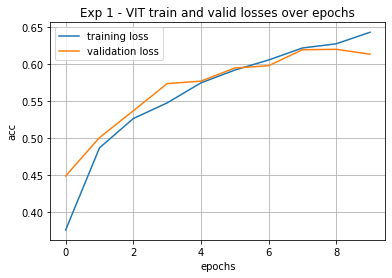

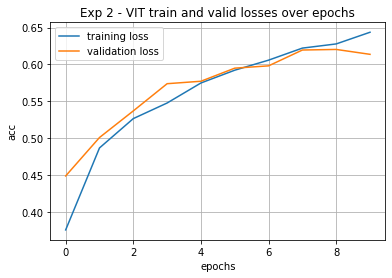

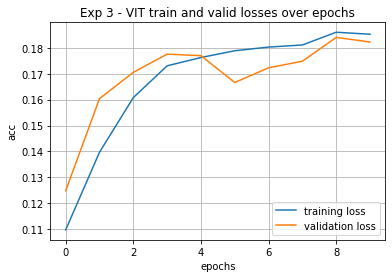

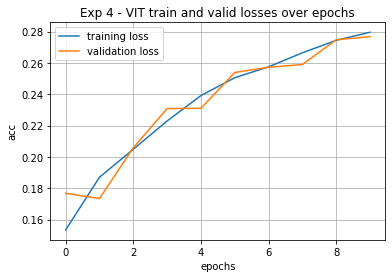

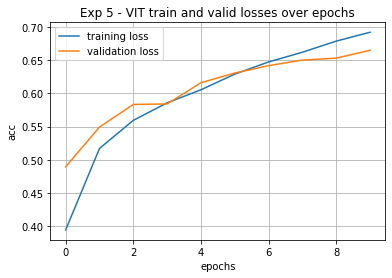

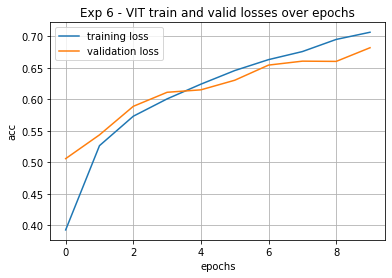

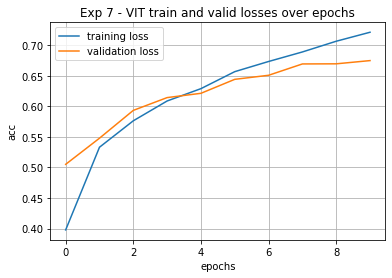

In [ ]:
# , replace
D = Charts(29,29)
for k in configs_vit.keys():
  # k=3
  plt.figure(k)
  print(k)
  try:
    args = configs_vit[k] 
    log_dir = os.path.join(args.log_dir, args.exp_id)
    print(os.path.join(log_dir, "train_loss.txt"))
    with open(os.path.join(log_dir, "train_acc.txt")) as f:
        train_losses = f.readlines()
        train_losses = [float(str(e).replace("\n", "")) for e in train_losses]

    with open(os.path.join(log_dir, "valid_acc.txt")) as f:
        valid_losses = f.readlines()
        valid_losses = [float(str(e).replace("\n", "")) for e in valid_losses]
    
    # with open(os.path.join(log_dir, "train_ppl.txt")) as f:
    #     train_ppls = f.readlines()
    #     train_ppls = [float(str(e).replace("\n", "")) for e in train_ppls]

    # with open(os.path.join(log_dir, "valid_ppl.txt")) as f:
    #     valid_ppls = f.readlines()
    #     valid_ppls = [float(str(e).replace("\n", "")) for e in valid_ppls]

    print(train_losses)
    print(valid_losses)
    D = Charts(29,29)
    title="Exp {} - VIT train and valid losses over epochs".format(k)
    print(title)
    xlabel="epochs"
    ylabel="acc"

    D.lineplot([list(range(len(train_losses))), list(range(len(valid_losses)))], 
                [train_losses, valid_losses], 
                ["training loss", "validation loss"], 
                True,
                xlabel, 
                ylabel,
                title)
    # saved_plot = os.path.join(log_dir, title+".png")
    # print(saved_plot)
    # plt.savefig(saved_plot)
    print("------------")
  except Exception as e:
    print("experiment folder not found, train the experiement first / erreur : {}".format(e))

# /content/assignment/logs/exp_1/valid_loss.txt

1
/content/assignment/logs/vit_exp_1
['training accuracy', 'validation accuracy']
{'training accuracy', 'validation accuracy'}
/content/assignment/logs/vit_exp_1/Exp 1 - VIT train and valid Accuracy over epochs.png
2
/content/assignment/logs/vit_exp_2
['training accuracy', 'validation accuracy']
{'training accuracy', 'validation accuracy'}
/content/assignment/logs/vit_exp_2/Exp 2 - VIT train and valid Accuracy over epochs.png
3
/content/assignment/logs/vit_exp_3
['training accuracy', 'validation accuracy']
{'training accuracy', 'validation accuracy'}
/content/assignment/logs/vit_exp_3/Exp 3 - VIT train and valid Accuracy over epochs.png
4
/content/assignment/logs/vit_exp_4
['training accuracy', 'validation accuracy']
{'training accuracy', 'validation accuracy'}
/content/assignment/logs/vit_exp_4/Exp 4 - VIT train and valid Accuracy over epochs.png
5
/content/assignment/logs/vit_exp_5
['training accuracy', 'validation accuracy']
{'training accuracy', 'validation accuracy'}
/content/assi

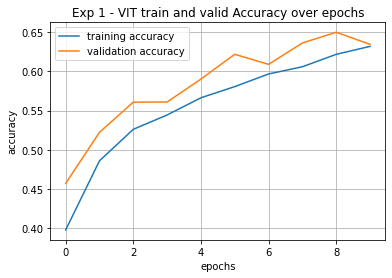

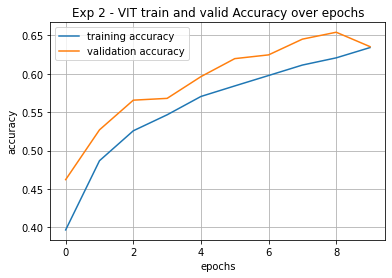

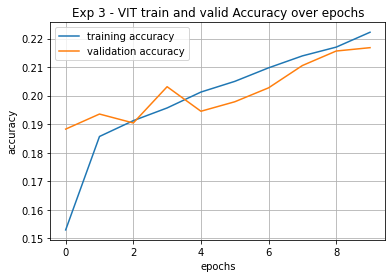

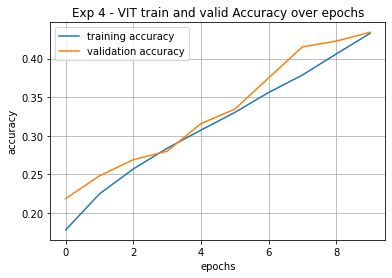

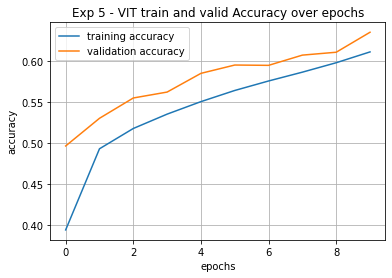

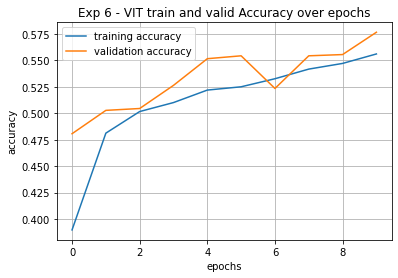

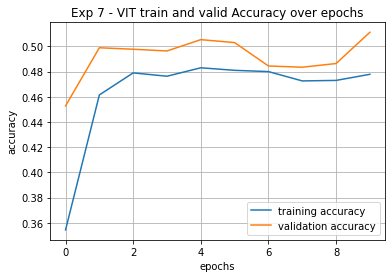

In [ ]:
# , replace
D = Charts(29,29)
for k in configs_vit.keys():
  # k=3
  plt.figure(k)
  print(k)
  try:
    args = configs_vit[k] 
    log_dir = os.path.join(args.log_dir, args.exp_id)

    # with open(os.path.join(log_dir, "train_loss.txt")) as f:
    #     train_losses = f.readlines()
    #     train_losses = [float(str(e).replace("\n", "")) for e in train_losses]

    # with open(os.path.join(log_dir, "valid_loss.txt")) as f:
    #     valid_losses = f.readlines()
    #     valid_losses = [float(str(e).replace("\n", "")) for e in valid_losses]
    print(log_dir)
    with open(os.path.join(log_dir, "train_acc.txt")) as f:
        train_acc = f.readlines()
        train_acc = [float(str(e).replace("\n", "")) for e in train_acc]

    with open(os.path.join(log_dir, "valid_acc.txt")) as f:
        valid_acc = f.readlines()
        valid_acc = [float(str(e).replace("\n", "")) for e in valid_acc]

    # print(np.cumsum(train_time).tolist())
    # print(train_loss)
    # print(len(train_time))
    # print(len(valid_time))
    D = Charts(29,29)
    title="Exp {} - VIT train and valid Accuracy over epochs".format(k)
    xlabel="epochs"
    ylabel="accuracy"

    D.lineplot(range(10), 
                [train_acc, valid_acc], 
                ["training accuracy", "validation accuracy"], 
                True,
                xlabel, 
                ylabel,
                title)
    saved_plot = os.path.join(log_dir, title+".png")
    print(saved_plot)
    plt.savefig(saved_plot)
    


    # print("------------")
  except:
    print("experiment folder not found, train the experiement first")

# /content/assignment/logs/exp_1/valid_loss.txt

ValueError: ignored

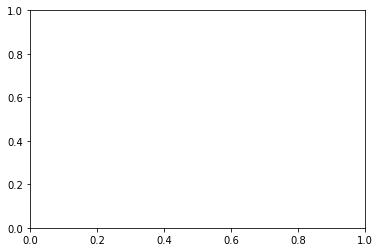

In [ ]:
# # , replace
# D = Charts(39,39)

# lines = []
# labels = []
# for k in configs_vit.keys():
#   # try:
#   labels.append("train acc {}".format(k))
#   args = configs_vit[k] 
#   log_dir = os.path.join(args.log_dir, args.exp_id)
#   with open(os.path.join(log_dir, "train_acc.txt")) as f:
#       train_acc = f.readlines()
#       train_acc = [float(str(e).replace("\n", "")) for e in train_acc]
#       lines.append(train_acc)

  
# plt.figure(k)
# D = Charts(29,29)
# title="Exp {} - VIT valid Accuracy over epochs".format(k)
# xlabel="epochs"
# ylabel="accuracy"


# D.lineplot(range(10), 
#             lines, 
#             labels, 
#             True,
#             xlabel, 
#             ylabel,
#             title)

# /content/assignment/logs/exp_1/valid_loss.txt

In [ ]:
# # , replace
# D = Charts(39,39)

# lines = []
# labels = []
# for k in configs_vit.keys():
#   # try:
#   labels.append("train acc {}".format(k))
#   args = configs_vit[k] 
#   log_dir = os.path.join(args.log_dir, args.exp_id)
#   with open(os.path.join(log_dir, "train_acc.txt")) as f:
#       train_acc = f.readlines()
#       train_acc = [float(str(e).replace("\n", "")) for e in train_acc]
#       lines.append(train_acc)

# with open(os.path.join(log_dir, "train_time.txt")) as f:
#     train_time = f.readlines()
#     train_time = [float(str(e).replace("\n", "")) for e in train_time]
#     train_time = np.cumsum(train_time).tolist()
  
# plt.figure(k)
# D = Charts(29,29)
# title="Exp {} - VIT train and valid Accuracy over epochs".format(k)
# xlabel="epochs"
# ylabel="accuracy"

# D.lineplot(train_time, 
#             lines, 
#             labels, 
#             True,
#             xlabel, 
#             ylabel,
#             title)

In [ ]:
# , replace
D = Charts(39,39)

lines = []
labels = []
valid_time_lines=[]
for k in configs_vit.keys():
  # try:
  labels.append("valid acc {}".format(k))
  args = configs_vit[k] 
  log_dir = os.path.join(args.log_dir, args.exp_id)
  with open(os.path.join(log_dir, "valid_acc.txt")) as f:
      valid_acc = f.readlines()
      valid_acc = [float(str(e).replace("\n", "")) for e in valid_acc]
      lines.append(valid_acc)
  
  with open(os.path.join(log_dir, "valid_time.txt")) as f:
      valid_time = f.readlines()
      valid_time = [float(str(e).replace("\n", "")) for e in valid_time]
      valid_time_lines.append(np.cumsum(valid_time))
  
plt.figure(k)
D = Charts(29,29)
title="Exp {} - VIT Valid Accuracy over time".format(k)
xlabel="time"
ylabel="accuracy"


# valid_time_cumul = np.cumsum(valid_time_lines)  
print(valid_time_lines)

D.lineplot(valid_time_lines,
            lines, 
            labels, 
            True,
            xlabel, 
            ylabel,
            title)

NameError: ignored

[array([0.67865992, 1.37516189, 2.03384352, 2.70330453, 3.39077997,
       4.05695915, 4.74695063, 5.4247694 , 6.1095016 , 6.78367734]), array([0.69636488, 1.3776722 , 2.051229  , 2.72973108, 3.43711901,
       4.13776231, 4.82139325, 5.50401139, 6.18846846, 6.86454892]), array([0.67562556, 1.35320234, 2.0258081 , 2.7080934 , 3.3761549 ,
       4.06019616, 4.72631049, 5.45061183, 6.16740489, 6.85536122]), array([0.70135212, 1.41816807, 2.11667752, 2.7805202 , 3.47599649,
       4.15989494, 4.84156895, 5.52866483, 6.21243334, 6.88850403]), array([0.9355154 , 1.87452412, 2.80502915, 3.73218918, 4.69210958,
       5.63055491, 6.5610826 , 7.48628545, 8.41755772, 9.34717274]), array([ 1.21378398,  2.42468858,  3.64019799,  4.85144043,  6.05983567,
        7.26106668,  8.4772799 ,  9.69363046, 10.92683387, 12.15440989]), array([ 1.22393966,  2.43518114,  3.66890168,  4.87378407,  6.09581113,
        7.32069063,  8.52775741,  9.74862695, 10.95928597, 12.17704701])]
['valid acc 1', 'valid acc 

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

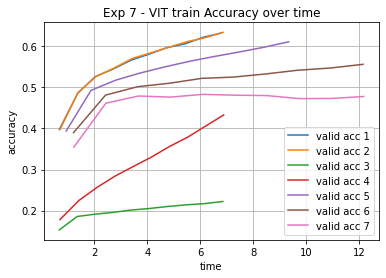

In [ ]:
D = Charts(39,39)

lines = []
labels = []
valid_time_lines=[]
for k in configs_vit.keys():
  # try:
  labels.append("valid acc {}".format(k))
  args = configs_vit[k] 
  log_dir = os.path.join(args.log_dir, args.exp_id)
  with open(os.path.join(log_dir, "train_acc.txt")) as f:
      train_acc = f.readlines()
      train_acc = [float(str(e).replace("\n", "")) for e in train_acc]
      lines.append(train_acc)
  
  with open(os.path.join(log_dir, "valid_time.txt")) as f:
      valid_time = f.readlines()
      valid_time = [float(str(e).replace("\n", "")) for e in valid_time]
      valid_time_lines.append(np.cumsum(valid_time))
  
plt.figure(k)
D = Charts(29,29)
title="Exp {} - VIT Train Accuracy over time".format(k)
xlabel="time"
ylabel="accuracy"


# valid_time_cumul = np.cumsum(valid_time_lines)  
print(valid_time_lines)

D.lineplot(valid_time_lines,
            lines, 
            labels, 
            True,
            xlabel, 
            ylabel,
            title)

In [ ]:
# def plot_all_vit():
#   num_configs = 7 # number of config + 1
#   fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 8))
#   ax = axes[0]
#   ax2 = axes[1]
#   ax3 = axes[2]
#   colors = ['purple','c','r', 'darkorange', 'black','b', 'g']

#   # Accuracy - epoch PLOT
#   for config_num in range(1,num_configs):

#     # accuracy over epochs PLOT 
#     train_file = str("/content/assignment/logs/vit/conf_" + str(config_num) + "/debug/train_acc.txt")
#     valid_file = str("/content/assignment/logs/vit/conf_" + str(config_num) + "/debug/valid_acc.txt")
#     conf_parameters_file = str("/content/assignment/logs/vit/conf_" + str(config_num) + "/debug/args.json")

#     with open (train_file, "r") as myfile:
#       train_acc = myfile.read().splitlines()
#       train_acc = [float(i) for i in train_acc]
#     with open (valid_file, "r") as myfile:
#       valid_acc = myfile.read().splitlines()
#       valid_acc = [float(i) for i in valid_acc]
#     with open (conf_parameters_file) as myfile:
#       conf_parameters = json.load(myfile)

#     train_label = str(str(config_num) + ' -- Train: ' + conf_parameters['model'] + ',' + str(conf_parameters['num_layers']) + ' layers,' + conf_parameters['optimizer'])
#     valid_label = str(str(config_num) + ' -- Valid: ' + conf_parameters['model'] + ',' + str(conf_parameters['num_layers']) + ' layers,' + conf_parameters['optimizer'])
#     ax.set_title("Training and validation Accuracy over epochs", fontsize='12')
#     ax.set_xlabel("Epoch",fontsize='13')	
#     ax.set_ylabel("Accuracy",fontsize='13')
#     c = colors[config_num-1]
#     ax.plot(train_acc, color=c, linestyle='dashed', label=train_label)
#     ax.plot(valid_acc, color=c, label=valid_label)

#   ax.legend(loc='best')	


#   # Accuracy - wall clock time -- train PLOT
#   for config_num in range(1,num_configs):

#     # accuracy over wall clock time PLOT 
#     train_file = str("/content/assignment/logs/vit/conf_" + str(config_num) + "/debug/train_acc.txt")
#     # valid_file = str("/content/assignment/logs/vit/conf_" + str(config_num) + "/debug/valid_acc.txt")
#     conf_parameters_file = str("/content/assignment/logs/vit/conf_" + str(config_num) + "/debug/args.json")
#     train_file_time = str("/content/assignment/logs/vit/conf_" + str(config_num) + "/debug/train_time.txt")
#     # valid_file_time = str("/content/assignment/logs/vit/conf_" + str(config_num) + "/debug/valid_time.txt")

#     with open (train_file, "r") as myfile:
#       train_acc = myfile.read().splitlines()
#       train_acc = [float(i) for i in train_acc]
#     # with open (valid_file, "r") as myfile:
#     #   valid_acc = myfile.read().splitlines()
#     #   valid_acc = [float(i) for i in valid_acc]
#     with open (train_file_time, "r") as myfile:
#       train_time = myfile.read().splitlines()
#       train_time = [float(i) for i in train_time]
#     # with open (valid_file_time, "r") as myfile:
#     #   valid_time = myfile.read().splitlines()
#     #   valid_time = [float(i) for i in valid_time]
#     with open (conf_parameters_file) as myfile:
#       conf_parameters = json.load(myfile)
    
#     train_time_cumul = np.cumsum(train_time)  

#     train_label = str(str(config_num) + ' -- Train: ' + conf_parameters['model'] + ',' + str(conf_parameters['num_layers']) + ' layers,' + conf_parameters['optimizer'])
#     # valid_label = str(str(config_num) + ' -- Valid: ' + conf_parameters['model'] + ',' + str(conf_parameters['num_layers']) + ' layers,' + conf_parameters['optimizer'])
#     ax2.set_title("Training Accuracy over wall clock time", fontsize='12')
#     ax2.set_xlabel("Wall clock time",fontsize='13')	
#     ax2.set_ylabel("Accuracy",fontsize='13')
#     c = colors[config_num-1]
#     ax2.plot(train_time_cumul, train_acc, color=c, linestyle='dashed', label=train_label)
#     # ax2.plot(valid_acc, color=c, label=valid_label)

#   ax2.legend(loc='best')	


#   # Accuracy - wall clock time -- valid PLOT
#   for config_num in range(1,num_configs):

#     # accuracy over wall clock time PLOT 
#     valid_file = str("/content/assignment/logs/vit/conf_" + str(config_num) + "/debug/valid_acc.txt")
#     conf_parameters_file = str("/content/assignment/logs/vit/conf_" + str(config_num) + "/debug/args.json")
#     valid_file_time = str("/content/assignment/logs/vit/conf_" + str(config_num) + "/debug/valid_time.txt")

#     with open (valid_file, "r") as myfile:
#       valid_acc = myfile.read().splitlines()
#       valid_acc = [float(i) for i in valid_acc]
#     with open (valid_file_time, "r") as myfile:
#       valid_time = myfile.read().splitlines()
#       valid_time = [float(i) for i in valid_time]
#     with open (conf_parameters_file) as myfile:
#       conf_parameters = json.load(myfile)

#     valid_time_cumul = np.cumsum(valid_time) 

#     valid_label = str(str(config_num) + ' -- Valid: ' + conf_parameters['model'] + ',' + str(conf_parameters['num_layers']) + ' layers,' + conf_parameters['optimizer'])
#     ax3.set_title("Validation Accuracy over wall clock time", fontsize='12')
#     ax3.set_xlabel("Wall clock time",fontsize='13')	
#     ax3.set_ylabel("Accuracy",fontsize='13')
#     c = colors[config_num-1]
#     ax3.plot(valid_time_cumul, valid_acc, color=c, label=valid_label)

#   ax3.legend(loc='best')	

#   name = str('/content/assignment/figures/Q3/1/' + 'all_config' + '.png')
#   fig.savefig(name)	#saves the figure in the present directory
#   fig.show()